In [2]:
#FOR ANALYSIS/CLEANING/COMPUTATION:
import pandas as pd
import numpy as np

#FOR VISUALIZATION:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('review_shopping.csv' , delimiter='\t' , names = ['text', 'sentiment'] , header=None) # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.02 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
text         128
sentiment      2
dtype: int64


In [4]:
df['sentiment'].value_counts()

sentiment
neg    68
pos    60
Name: count, dtype: int64

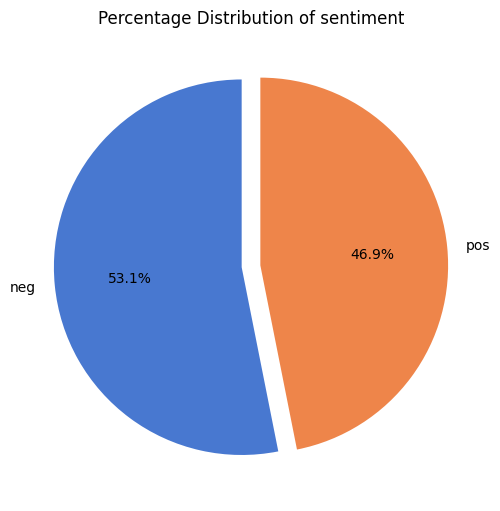

In [5]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['sentiment']
plot_categorical_distributions(columns_to_plot)

In [6]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ซะ',
 'พอ',
 'หน',
 'ฉัน',
 'บางขณะ',
 'ไม่ว่า',
 'เท่านี้',
 'เหตุไร',
 'อย่างไรเสีย',
 'จวน',
 'ขณะเดียวกัน',
 'กระทำ',
 'รวดเร็ว',
 'จนกระทั่ง',
 'กล่าวคือ',
 'มิ',
 'ตลอดปี',
 'นั่นเอง',
 'ร่วมมือ',
 'จนแม้น',
 'แค่นั้น',
 'แต่ก่อน',
 'ล่าสุด',
 'เหตุนั้น',
 'ครั้งคราว',
 'เป็นเพราะ',
 'พวก',
 'อันละ',
 'พอสม',
 'ต่างหาก',
 'ช่วงก่อน',
 'เหล่านี้',
 'พึ่ง',
 'ที่แท้จริง',
 'เช่นดังว่า',
 'ยาว',
 'อย่างหนึ่ง',
 'จวนจะ',
 'จากนี้ไป',
 'ปรากฏว่า',
 'ต้อง',
 'ทีละ',
 'มิฉะนั้น',
 'เมื่อคืน',
 'เห็น',
 'เกี่ยวข้อง',
 'มา',
 'พอๆ',
 'ร่วม',
 'คราวนั้น',
 'ครั้งหลัง',
 'ให้แด่',
 'เหล่า',
 'ทีเถอะ',
 'กล่าว',
 'บ่อยๆ',
 'ควร',
 'ทีๆ',
 'แต่ว่า',
 'นับแต่นั้น',
 'พา',
 'เรียบ',
 'บัดนี้',
 'นอกจากนี้',
 'เล็ก',
 'หน่อย',
 'แม้แต่',
 'พวกเขา',
 'มุ่งเน้น',
 'สมัยนั้น',
 'เป็นต้นมา',
 'ต่างๆ',
 'ช้าๆ',
 'อย่างมาก',
 'อยู่',
 'รือ',
 'ขณะ',
 'ใต้',
 'ทั่ว',
 'ดังเคย',
 'เมื่อเช้า',
 'เมื่อวันวาน',
 'เน้น',
 'เพื่อที่จะ',
 'ครั้ง',
 'ตั้งแต่',
 'ส่วนดี',
 'เท่ากับ',
 'แต่ทว่า',
 'รวมๆ',
 'รั

In [7]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final


In [8]:
import re
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text)
    text = re.sub(r'[^a-zA-Zก-ฮะ-์\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

In [9]:
df['text'] = df['text'].apply(clean_text)
df['text_tokens'] = df['text'].apply(text_process)

In [10]:
df.head()

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...


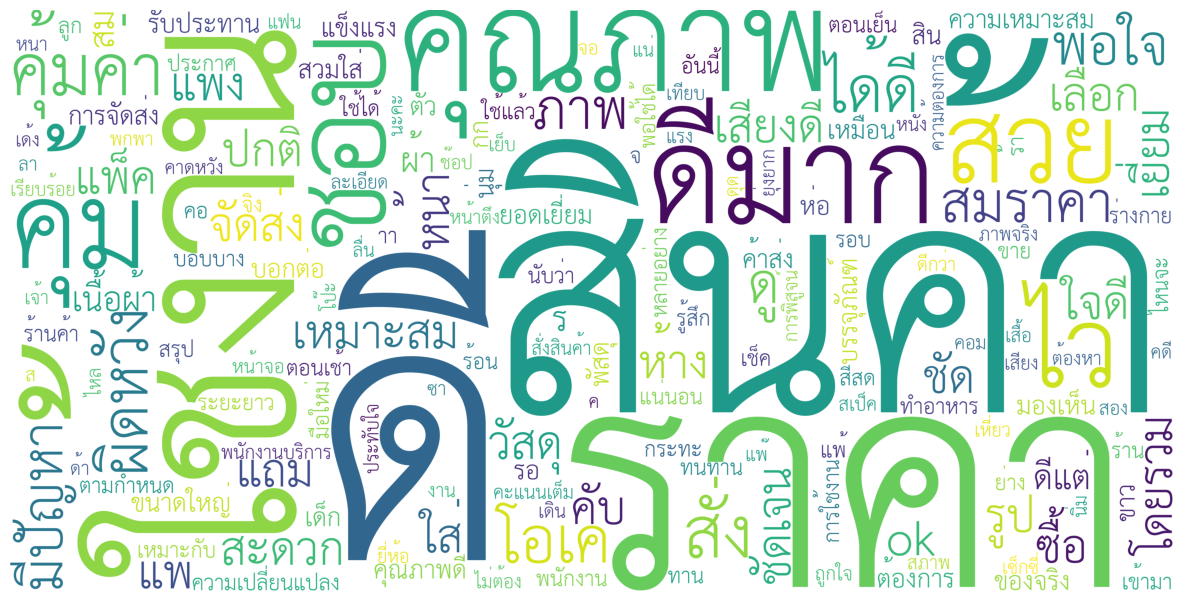

In [11]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

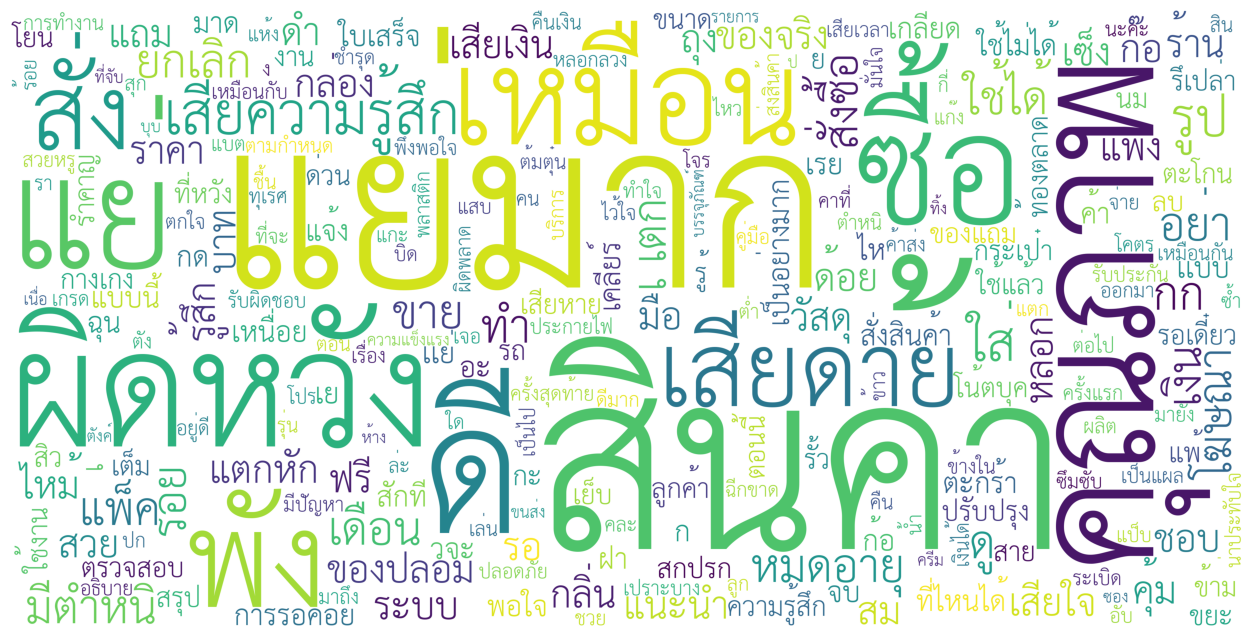

In [12]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])


<89x406 sparse matrix of type '<class 'numpy.int64'>'
	with 985 stored elements in Compressed Sparse Row format>

In [15]:
train_bow = cvec.transform(X_train['text_tokens'])
train_bow_df = pd.DataFrame(train_bow.toarray(), 
                            columns=cvec.get_feature_names_out(),
                            index=X_train['text_tokens'])

In [16]:
train_bow_df.head()

,ok,ก,กก,กระทะ,กระเป๋า,กลิ่น,กล่อง,กว่า,กะ,กัน,...,ไป,ไม่,ไม่ค่อย,ไม่ต้อง,ไว,ไว้,ไว้ใจ,ไห,ไหม้,ไหว
text_tokens,,,,,,,,,,,,,,,,,,,,,
ร้าน นี้ ขาย สินค้า ตรง ตาม ประกาศ ส่ง ตามกำหนด สินค้า ใช้งาน ดี,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
วัสดุ ค่อนข้าง ดี นับว่า คุ้ม ราคา ครับ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ส่ง ของ ไว ห่อ พัสดุ ดี ของ ใช้งาน เยี่ยม,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
คุณภาพ แย่มาก ค่ะ ใช้ ครั้งแรก มี กลิ่น ไหม้ ออกมา เลย แถม ข้าว ไม่ สุก ด้วย,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
จาก การพิสูจน์ เป็น หนัง แท้ เลือก ไม่ ผิด งาน เย็บ ละเอียด ชอบ ครับ,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.88      0.88      0.88        17
         pos       0.91      0.91      0.91        22

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



In [19]:
my_text = 'ใช้ดีขนาดนี้'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)